### Dependencies and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load
city_csv = "Resources/city_data.csv"
ride_csv = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_csv)
ride_data = pd.read_csv(ride_csv)

# Combine the data into a single dataset
#merge_table = pd.merge(info_pd, items_pd, on="customer_id", how="left")
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")
pyber_df = pyber_df.set_index(["city"])

# Display the data table for preview
pyber_df.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# Isolate each city type
urban_df = pyber_df[pyber_df.type == "Urban"]
suburban_df = pyber_df[pyber_df.type == "Suburban"]
rural_df = pyber_df[pyber_df.type == "Rural"]

# Bubble Plot of Ride Sharing Data

### Variable Setup

In [4]:
# Average Fare per City
urban_avg_fare = urban_df.groupby("city").fare.mean()
suburban_avg_fare = suburban_df.groupby("city").fare.mean()
rural_avg_fare = rural_df.groupby("city").fare.mean()

# Total Number of Rides per City
urban_tot_riders = urban_df.groupby("city").ride_id.count()
suburban_tot_riders = suburban_df.groupby("city").ride_id.count()
rural_tot_riders = rural_df.groupby("city").ride_id.count()

# Obtain the x and y coordinates for each of the three city types
x_urban = urban_tot_riders
y_urban = urban_avg_fare
x_suburban = suburban_tot_riders
y_suburban = suburban_avg_fare
x_rural = rural_tot_riders
y_rural = rural_avg_fare

# Driver Count
urban_driver_count = city_data[city_data.type == "Urban"]
urban_driver_count = urban_driver_count.sort_values("city", ascending=True)
urban_driver_count.set_index("city", inplace=True)
del urban_driver_count["type"]
urban_driver_count = urban_driver_count["driver_count"]

suburban_driver_count = city_data[city_data.type == "Suburban"]
suburban_driver_count = suburban_driver_count.sort_values("city", ascending=True)
suburban_driver_count.set_index("city", inplace=True)
del suburban_driver_count["type"]
suburban_driver_count = suburban_driver_count["driver_count"]

rural_driver_count = city_data[city_data.type == "Rural"]
rural_driver_count = rural_driver_count.sort_values("city", ascending=True)
rural_driver_count.set_index("city", inplace=True)
del rural_driver_count["type"]
rural_driver_count = rural_driver_count["driver_count"]

### Plot, Label

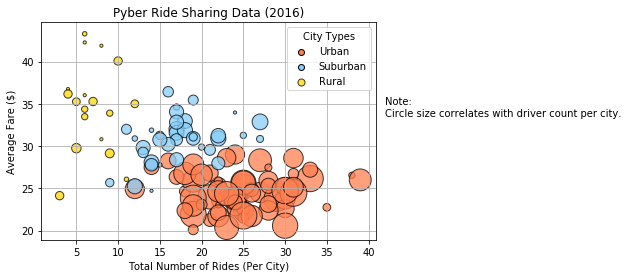

In [8]:
# Plot
urban_plot = plt.scatter(x_urban, y_urban, marker="o", facecolors="coral", edgecolors="black", s=urban_driver_count*10, alpha=0.75)
suburban_plot = plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_driver_count*10, alpha=0.75)
rural_plot = plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black", s=rural_driver_count*10, alpha=0.75)

# Labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42, 35,"Note:")
plt.text(42, 33.5,"Circle size correlates with driver count per city.")

# Legend
empty = []
urban_empty = plt.scatter(empty, empty, marker="o", facecolors="coral",  edgecolors="black", label="Urban")
suburban_empty = plt.scatter(empty, empty, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban")
rural_empty = plt.scatter(empty, empty, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")
plt.legend(handles=[urban_empty, suburban_empty, rural_empty], scatterpoints=1, loc="best", title="City Types")
plt.grid()

#Save Figure
plt.savefig("Images/BubblePlot.png")
plt.show()

# Total Fares by City Type

In [9]:
urban_tot_fares = urban_df.fare.sum()
suburban_tot_fares = suburban_df.fare.sum()
rural_tot_fares = rural_df.fare.sum()

In [10]:
labels = ["Urban", "Rural", "Suburban"]
total_fares = [urban_tot_fares, rural_tot_fares, suburban_tot_fares]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)

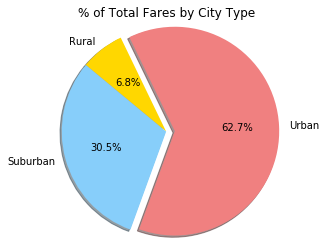

In [11]:
plt.pie(total_fares, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=250, radius=1.2)
plt.title("% of Total Fares by City Type")
plt.savefig("Images/TotalFares.png")
plt.show()

# Total Rides by City Type

In [12]:
urban_tot_rides = len(urban_df)
suburban_tot_rides = len(suburban_df)
rural_tot_rides = len(rural_df)
total_fares = [urban_tot_rides, rural_tot_rides, suburban_tot_rides]

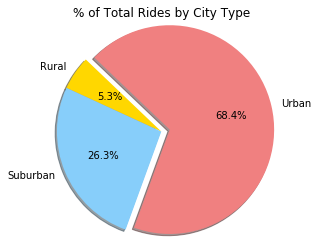

In [14]:
plt.pie(total_fares, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=250, radius=1.2)
plt.title("% of Total Rides by City Type")
plt.savefig("Images/TotalRides.png")
plt.show()

# Total Drivers by City Type

In [15]:
urban_tot_drivers = urban_driver_count.sum()
suburban_tot_drivers = suburban_driver_count.sum()
rural_tot_drivers = rural_driver_count.sum()
total_fares = [urban_tot_drivers, rural_tot_drivers, suburban_tot_drivers]

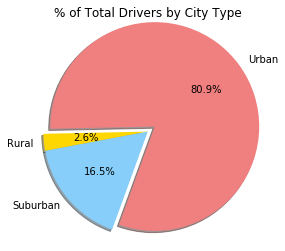

In [16]:
plt.pie(total_fares, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=250, radius=1.2)
plt.title("% of Total Drivers by City Type")
plt.savefig("Images/TotalDrivers.png")
plt.show()

# Analysis

Urban cities tend to have more rides, higher driver counts, and cheaper average fares, whereas rural cities tend to have less rides, lower driver counts, and more expensive average fares. Suburban cities consistently fall between urban and rural in all measurements obtained (fares, rides, and driver counts). Urban cities make up the majority of total fares (62.7%), total rides (68.4%), and total drivers (80.9%). 